# Problem 2

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">
<button>Toggle Code</button></a>''')

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set random seed
np.random.seed(1000)

In [3]:
"""
    Create dataset class
"""
class Dataset:
    """
        Class that creates linear/non-linear datasets
    """
    @classmethod
    def linear(cls, features=2, samples=50):
        """
            Creates linearly separable data
                features: number of features for data
                samples: number of samples
        """
        # create random weight vector based on number of features
        weights = cls._uniform_rand(features)
        
        # now create a bunch of random examples
        examples = cls._uniform_rand(samples,features)
        
        # now do the inner product of the weights with the examples
        decision = np.dot(examples,weights)
        
        # choose a random threshold
        threshold = (decision.max() + decision.min())/2
        class_assignment = 2*((decision > threshold)-0.5)
        
        # return assignment and examples
        return class_assignment,examples
        
    @classmethod
    def nonlinear(cls, features=2, samples=50):
        """
            Creates non-linearly separable data
                features: number of features for data
                samples: number of samples
        """
        # create random weight vector based on number of features
        weights = cls._uniform_rand(features)
        
        # now create a bunch of random examples
        examples = cls._uniform_rand(samples,features)
        
        # square all examples
        examples_squared = examples**2
                            
        # now do the inner product of the weights with the examples
        decision = np.dot(examples_squared,weights)
        
        # set class threshold that balances dataset
        for threshold in np.linspace(decision.min(),decision.max(),100):
            class_assignment = decision > threshold
            # good threshold when at least half of data is one class
            if np.count_nonzero(class_assignment) <= samples/2:
                class_assignment = 2*((decision > threshold)-0.5)
                break
        
        # return assignment and examples
        return class_assignment,examples
    
    @staticmethod
    def _uniform_rand(*args,**kwargs):
        """
            Generates a uniform random variable from -1 to 1
        """
        return (np.random.rand(*args,**kwargs)-0.5)*2
        

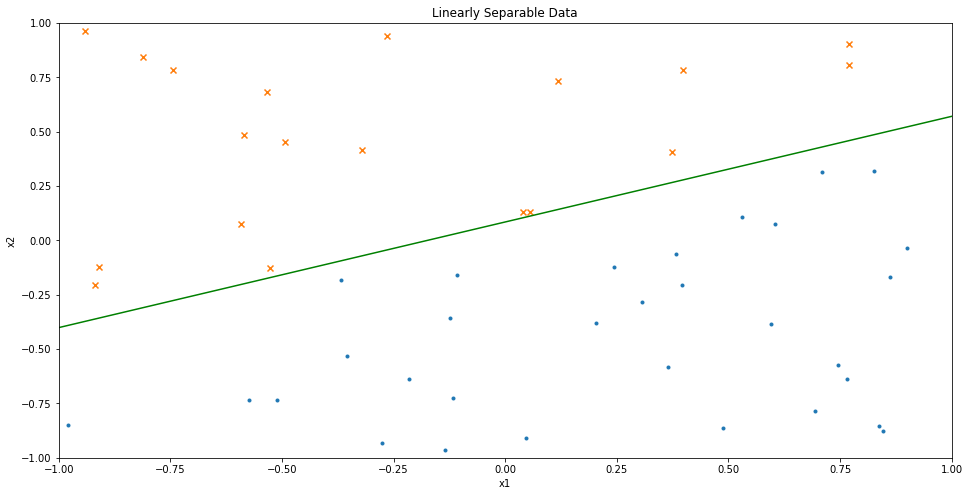

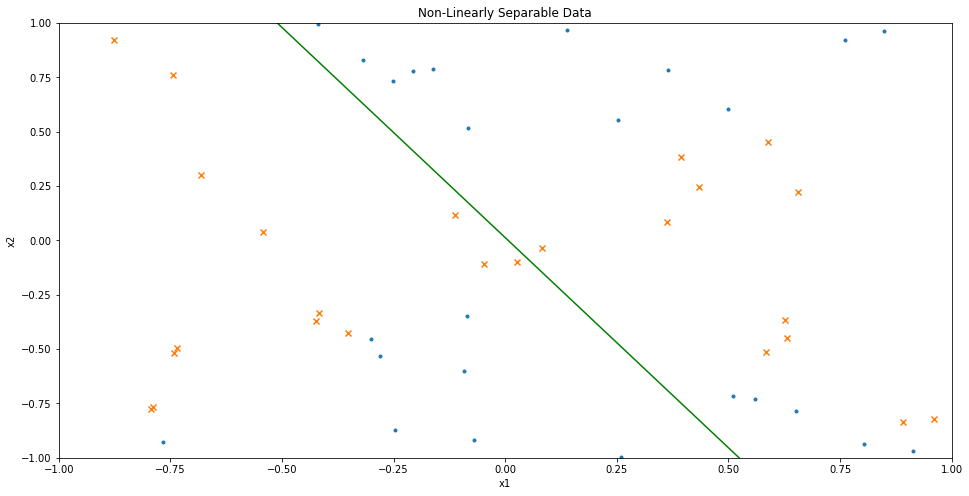

In [4]:
"""
    Find Least squares solution 
""" 

# get data
labels,data = Dataset.linear()
nl_labels,nl_data = Dataset.nonlinear()

# add bias term to data
bias = np.ones((data.shape[0],1))
nl_bias = np.ones((nl_data.shape[0],1))
data = np.concatenate((bias,data),axis=1)
nl_data = np.concatenate((nl_bias,nl_data),axis=1)

# do least squares through pseudo inverse
wlin = np.dot(np.linalg.pinv(data),labels)
wnlin = np.dot(np.linalg.pinv(nl_data),nl_labels)

# make x1 values
x1 = np.linspace(-1,1,100)

# plot linear data
x2 = -(wlin[0] + wlin[1]*x1)/wlin[2]
plt.figure(figsize=(16,8))
plt.scatter(data[labels==1][:,1],data[labels==1][:,2],marker='.')
plt.scatter(data[labels==-1][:,1],data[labels==-1][:,2],marker='x')
plt.plot(x1,x2,'g')
plt.title('Linearly Separable Data')
plt.xlim(-1,1); plt.ylim(-1,1)
plt.xlabel('x1'); plt.ylabel('x2')

# plot nonlinear data
nl_x2 = -(wnlin[0] + wnlin[1]*x1)/wnlin[2]
plt.figure(figsize=(16,8))
plt.scatter(nl_data[nl_labels==1][:,1],nl_data[nl_labels==1][:,2],marker='.')
plt.scatter(nl_data[nl_labels==-1][:,1],nl_data[nl_labels==-1][:,2],marker='x')
plt.plot(x1,nl_x2,'g')
plt.title('Non-Linearly Separable Data')
plt.xlim(-1,1); plt.ylim(-1,1)
plt.xlabel('x1'); plt.ylabel('x2')

# show plots
plt.show()